<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Interactive Bootstrap Demonstration

### Boostrap for Uncertainty in Sample Statistics Tutorial

* interactive plot demonstration with ipywidget package

#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1) | [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy)

#### Bootstrap

Uncertainty in the sample statistics
* one source of uncertainty is the paucity of data.
* do 200 or even less wells provide a precise (and accurate estimate) of the mean? standard deviation? skew? P13?

Would it be useful to know the uncertainty in these statistics due to limited sampling?
* what is the impact of uncertainty in the mean porosity e.g. 20%+/-2%?

**Bootstrap** is a method to assess the uncertainty in a sample statistic by repeated random sampling with replacement.

Assumptions
* sufficient, representative sampling, identical, idependent samples

Limitations
1. assumes the samples are representative 
2. assumes stationarity
3. only accounts for uncertainty due to too few samples, e.g. no uncertainty due to changes away from data
4. does not account for boundary of area of interest 
5. assumes the samples are independent
6. does not account for other local information sources

The Bootstrap Approach (Efron, 1982)

Statistical resampling procedure to calculate uncertainty in a calculated statistic from the data itself.
* Does this work?  Prove it to yourself, for uncertainty in the mean solution is standard error: 

\begin{equation}
\sigma^2_\overline{x} = \frac{\sigma^2_s}{n}
\end{equation}

Extremely powerful - could calculate uncertainty in any statistic!  e.g. P13, skew etc.
* Would not be possible access general uncertainty in any statistic without bootstrap.
* Advanced forms account for spatial information and sampling strategy (game theory and Journel’s spatial bootstrap (1993).

Steps: 

1. assemble a sample set, must be representative, reasonable to assume independence between samples

2. optional: build a cumulative distribution function (CDF)
    * may account for declustering weights, tail extrapolation
    * could use analogous data to support

3. For $\ell = 1, \ldots, L$ realizations, do the following:

    * For $i = \alpha, \ldots, n$ data, do the following:

        * Draw a random sample with replacement from the sample set or Monte Carlo simulate from the CDF (if available). 

6. Calculate a realization of the sammary statistic of interest from the $n$ samples, e.g. $m^\ell$, $\sigma^2_{\ell}$. Return to 3 for another realization.

7. Compile and summarize the $L$ realizations of the statistic of interest.

This is a very powerful method.  Let's try it out.


#### Objective 

Provide an example and demonstration for:

1. interactive plotting in Jupyter Notebooks with Python packages matplotlib and ipywidgets
2. provide an intuitive hands-on example of statistical boostrap   

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 
2. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality. 

#### Load the Required Libraries

The following code loads the required libraries.

In [289]:
%matplotlib inline
from ipywidgets import interactive                        # widgets and interactivity
from ipywidgets import widgets                            # widgets and interactivity
from ipywidgets import Layout
from ipywidgets import Label
from ipywidgets import VBox, HBox
import matplotlib.pyplot as plt                           # plotting
import numpy as np                                        # working with arrays
import pandas as pd                                       # working with DataFrames
from scipy.stats import triang                            # parametric distributions
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import uniform
from scipy.stats import triang
from scipy import stats
import random

#### Make a Synthetic Dataset

This is an interactive method to:

* select a parametric distribution

* select the distribution parameters

* select the number of samples and visualize the synthetic dataset distribution

In [269]:
# parameters for the synthetic dataset
bins = np.linspace(0,1000,1000)

l = widgets.Text(value='                                      Boostrap Demonstration, Michael Pyrcz, Associate Professor, The University of Texas at Austin',layout=Layout(width='950px', height='30px'))
dist = widgets.Dropdown(
    options=['Triangular', 'Uniform', 'Gaussian'],
    value='Gaussian',
    description='Dataset Distribution:',
    disabled=False,
    layout=Layout(width='200px', height='30px')
)

a = widgets.FloatSlider(min=0.0, max = 100.0, value = 0.5, description = 'Dataset: Mean / Mode',orientation='vertical',layout=Layout(width='170px', height='200px'))
a.style.handle_color = 'blue'
d = widgets.FloatSlider(min=0.01, max = 30.0, value = 5.0, step = 1.0, description = 'Dataset: St. Deviation',orientation='vertical',layout=Layout(width='130px', height='200px'))
d.style.handle_color = 'green'
b = widgets.FloatSlider(min = 0, max = 100.0, value = 0.5, description = 'Dataset: Minimum',orientation='vertical',layout=Layout(width='130px', height='200px'))
b.style.handle_color = 'red'
c = widgets.IntSlider(min = 0, max = 100, value = 100, description = 'Dataset: Maximum',orientation='vertical',layout=Layout(width='130px', height='200px'))
c.style.handle_color = 'orange'
n = widgets.IntSlider(min = 2, max = 1000, value = 100, description = 'Dataset: Number Samples',orientation='vertical',layout=Layout(width='180px', height='200px'))
n.style.handle_color = 'gray'
ui = widgets.HBox([dist,a,d,b,c,n],)
ui2 = widgets.VBox([l,ui],)

def f_make(dist,a, b, c, d, n):
    dataset = make_data(dist,a, b, c, d, n)
    
    plt.subplot(111) 
    plt.hist(
        dataset,
        alpha=0.2,
        color="red",
        edgecolor="black",
        bins=bins) 
    plt.xlim(0.0,100.0); plt.title('Synthetic Dataset'); plt.ylabel('Frequency'); plt.xlabel('Data Values')
            
    plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.6, wspace=0.2, hspace=0.3)
    plt.show()

def make_data(dist,a, b, c, d, n):                                        # function to make the plot   
    if dist == 'Uniform':
        if b >= c:
            print('Invalid uniform distribution parameters')
            return None
        dataset = uniform.rvs(size=n, loc = b, scale = c, random_state = 73073).tolist()
        return dataset
    elif dist == 'Triangular':
        interval = c - b
        if b >= a or a >= c or interval <= 0:
            print('Invalid triangular distribution parameters')
            return None        
        dataset = triang.rvs(size=n, loc = b, c = (a-b)/interval, scale = interval, random_state = 73073).tolist()
        return dataset
    elif dist == 'Gaussian':
        dataset = norm.rvs(size=n, loc = a, scale = d, random_state = 73073).tolist()
        return dataset

interactive_plot = widgets.interactive_output(f_make, {'dist': dist,'a': a, 'd': d, 'b': b, 'c': c, 'n': n})
interactive_plot.clear_output(wait = True)                # reduce flickering by delaying plot updating

#### Display the GUI for Building the Synthetic Dataset

We display the GUI now.  Select the desired parametric distribution and associated parameters.

* if the parameters are invalid (e.g. traingular mode > max) an error message should display.

In [270]:
display(ui2, interactive_plot)                            # display the interactive plot

Output()

We now have a synthetic dataset to work with. 

* Let's make a DataFrame and then check the summary statistics


In [319]:
data = make_data(dist.value,a.value, b.value, c.value, d.value, n.value)
df = pd.DataFrame({'DataSet':data})
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DataSet,51.0,53.966955,16.03223,6.095644,45.490807,53.131809,65.863422,89.260257


#### Perform Bootstrap 

Now we take the synthetic dataset sampled from the parametric distributioin above and apply it to statistical bootstrap.

* we calculate the sampling distributions / uncertainty in the mean and standard deviation

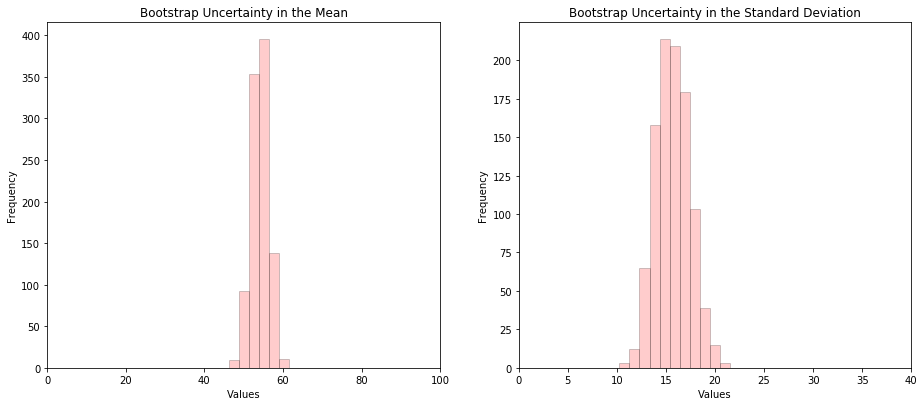

Summary Statistics for Bootstrap for Uncertainty in the Mean:
DescribeResult(nobs=1000, minmax=(46.190183781064285, 61.435871320617), mean=54.10784579356871, variance=4.976661744014822, skewness=-0.024634766340307555, kurtosis=0.0024106096943987687)
P10: 51.276, P50: 54.155, P90: 57.034

Summary Statistics for Bootstrap for Uncertainty in the Standard Deviation:
DescribeResult(nobs=1000, minmax=(10.58640726281837, 21.06899009131718), mean=15.660218551491063, variance=2.9325513551442923, skewness=0.14971433933641395, kurtosis=-0.21164828036370276)
P10: 13.495, P50: 15.63, P90: 17.944


In [320]:
L = 1000                                 # set the number of realizations
mean = np.zeros(L); stdev = np.zeros(L)    # declare arrays to hold the realizations of the statistics
for l in range(0, L):                      # loop over realizations
    samples = random.choices(df['DataSet'].values, weights=None, cum_weights=None, k=len(df))
    mean[l] = np.average(samples)
    stdev[l] = np.std(samples)
    
plt.subplot(121)
plt.hist(mean,alpha=0.2,color="red",edgecolor="black",bins=np.linspace(0,100,40)); plt.xlim(0,100); plt.ylabel('Frequency'); plt.xlabel('Values'); plt.title('Bootstrap Uncertainty in the Mean')


plt.subplot(122)
plt.hist(stdev,alpha=0.2,color="red",edgecolor="black",bins=np.linspace(0,40,40)); plt.xlim(0,40); plt.ylabel('Frequency'); plt.xlabel('Values'); plt.title('Bootstrap Uncertainty in the Standard Deviation')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()   
    
print('Summary Statistics for Bootstrap for Uncertainty in the Mean:')
print(stats.describe(mean))
print('P10: ' + str(round(np.percentile(mean,10),3)) + ', P50: ' + str(round(np.percentile(mean,50),3)) + ', P90: ' + str(round(np.percentile(mean,90),3))) 

print('\nSummary Statistics for Bootstrap for Uncertainty in the Standard Deviation:')
print(stats.describe(stdev))
print('P10: ' + str(round(np.percentile(stdev,10),3)) + ', P50: ' + str(round(np.percentile(stdev,50),3)) + ', P90: ' + str(round(np.percentile(stdev,90),3)))

#### Change the Number of Data

Let's change the number of data drawn to observe the change in uncertainty

* we will assume the same dataset and not recalculate it each time


In [347]:
# parameters for the synthetic dataset
bins = np.linspace(0,1000,1000)

l = widgets.Text(value='                           Boostrap Demonstration with Modified Number of Data, Michael Pyrcz, Associate Professor, The University of Texas at Austin',layout=Layout(width='950px', height='30px'))

n = widgets.IntSlider(min = 2, max = 1000, value = 100, description = 'New Number Samples',orientation='horizontal',layout=Layout(width='800px', height='20px'))
n.style.handle_color = 'gray'

ui3 = widgets.VBox([l,n],)

def f_rerun(n):
    L = 1000                                 # set the number of realizations
    mean2 = np.zeros(L); stdev2 = np.zeros(L)    # declare arrays to hold the realizations of the statistics
    for l in range(0, L):                      # loop over realizations
        samples = random.choices(df['DataSet'].values, weights=None, cum_weights=None, k=n)
        mean2[l] = np.average(samples)
        stdev2[l] = np.std(samples)
    
    plt.subplot(121)
    plt.hist(mean,alpha=0.2,color="red",edgecolor="black",bins=np.linspace(0,100,40),label='Original'); plt.xlim(0,100); plt.ylabel('Frequency'); plt.xlabel('Values'); plt.title('Bootstrap Uncertainty in the Mean')
    plt.hist(mean2,alpha=0.2,color="blue",edgecolor="black",bins=np.linspace(0,100,40),label='New'); plt.xlim(0,100); plt.ylabel('Frequency'); plt.xlabel('Values'); plt.title('Bootstrap Uncertainty in the Mean')
    plt.legend()

    plt.subplot(122)
    plt.hist(stdev,alpha=0.2,color="red",edgecolor="black",bins=np.linspace(0,40,40),label='Original'); plt.xlim(0,40); plt.ylabel('Frequency'); plt.xlabel('Values'); plt.title('Bootstrap Uncertainty in the Standard Deviation')
    plt.hist(stdev2,alpha=0.2,color="blue",edgecolor="black",bins=np.linspace(0,40,40),label='New'); plt.xlim(0,40); plt.ylabel('Frequency'); plt.xlabel('Values'); plt.title('Bootstrap Uncertainty in the Standard Deviation')
    plt.legend()
    
    plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2)  
    plt.show()  

interactive_plot3 = widgets.interactive_output(f_rerun, {'n': n})
interactive_plot3.clear_output(wait = True)                # reduce flickering by delaying plot updating

#### Display the GUI for Modifying the Number of Data

We display the GUI now. Select the desired number of data

* observed the change (new) vs. the original (original) bootstrap uncertainty as the number of data ranges from less than to greater than the original number of data  

In [348]:
display(ui3, interactive_plot3)                            # display the interactive plot

Output()

#### Comments

This was a simple demonstration of interactive plots in Jupyter Notebook Python with the ipywidgets and matplotlib packages. 

I have many other demonstrations on data analytics and machine learning, e.g. on the basics of working with DataFrames, ndarrays, univariate statistics, plotting data, declustering, data transformations, trend modeling and many other workflows available at https://github.com/GeostatsGuy/PythonNumericalDemos and https://github.com/GeostatsGuy/GeostatsPy. 
  
I hope this was helpful,

*Michael*

#### The Author:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
